<a href="https://colab.research.google.com/github/moazzamfarid/trader/blob/master/Candles_daily_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, train_test_split

In [0]:
df=pd.read_csv('drive/My Drive/mozam/Es.D.txt').set_index(['Date','Time'])

In [0]:
!pip3 install pandas_ta
import pandas_ta as ta

In [0]:
df=pd.concat([df,ta.volatility.bbands(df.Close)],join='outer',axis=1)

In [8]:
df['rsi']=ta.momentum.rsi(df.Close,2)
df['vwap']=ta.overlap.vwap(df.High,df.Low,df.Close,df.Vol)
df=pd.concat([df,ta.momentum.stoch(df.High,df.Low,df.Close)],join='outer',axis=1).dropna()
df['super_trend']=ta.overlap.supertrend(df.High, df.Low, df.Close,21)['SUPERT_21_3.0']

[!] VWAP volume series is not datetime ordered. Results may not be as expected.


In [0]:
df['adx']=ta.trend.adx(df.High,df.Low,df.Close).ADX_14
df['fwma']=ta.overlap.fwma(df.Close)
df['willr']=ta.momentum.willr(df.High,df.Low,df.Close)
df['bias']=ta.momentum.bias(df.Close)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


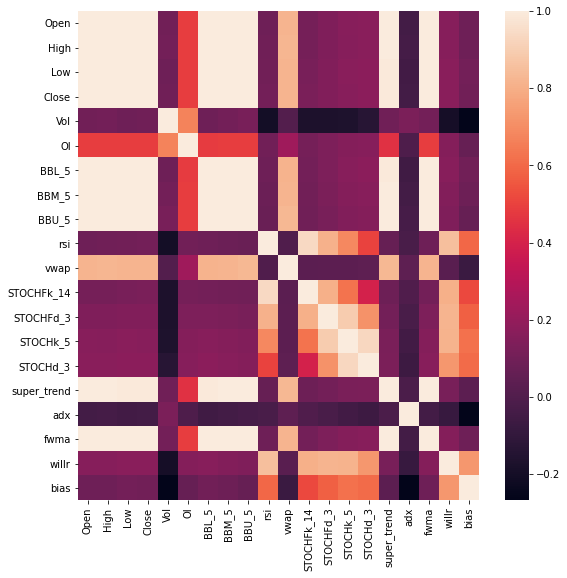

In [15]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr())

In [16]:
df['Close']=df['Close'].shift(1)
df=df.dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(df.drop(columns=['Close']).values)
y = sc_y.fit_transform(df.Close.values.reshape(-1, 1))
X_trains=[]
y_trains=[]
X_tests=[]
y_tests=[]
kf = KFold(n_splits=8)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_trains.append(X[train_index])
    X_tests.append(X[test_index])
    y_trains.append(y[train_index])
    y_tests.append(y[test_index])

In [23]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB_error=[]
for i in range(8):
  print('Processing Batch : ',i+1)
  XGB.fit(X_trains[i],y_trains[i])
  XGB_error.append(mean_absolute_error(y_tests[i],XGB.predict(X_tests[i])))

Processing Batch :  1
[21:39:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  2
[21:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  3
[21:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  4
[21:39:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  5
[21:39:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  6
[21:39:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Processing Batch :  7
[21:39:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is no

In [24]:
XGB_error

[0.0065768957575845065,
 0.005579934439837836,
 0.005833777165401967,
 0.02973253317696267,
 0.005669984075538987,
 0.06014952733404631,
 0.03370888053291198,
 0.29654171040150523]